# **Data Preprocessing and Basic Models**

Forum used - [Pytorch](https://discuss.pytorch.org/)

> Explore Data

> Data Preprocessing

> Data Modelling



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
data = pd.read_csv('/content/drive/My Drive/PytorchCommunityData.csv')
data.head()

,Unnamed: 0,Topic Title,Category,Tags,Leading Post,Post Replies,Created_at,Likes,Views,Replies
0,113,About the audio category,audio,[],(Replace this first paragraph with a brief des...,['It would be nice to have some links or somet...,3/15/2018 8:35,0,643,2
1,114,Error while importing torchaudio,audio,[],\n Bug\nI’m getting this error:\nAttributeErro...,[],0,0,0,0
2,115,How do I know which spectrogram frames belong ...,audio,[],I’ve been using this script:\nspgram = torchau...,[],0,0,0,0
3,116,Constant/Variable Q Transform,audio,[],"Hi,\nI’ve been looking into using a Constant Q...",[],0,0,0,0
4,117,Invalid argument 0: Sizes of tensors must matc...,audio,[],"Hello, I am trying to train a speech enhanceme...",['These shape errors are often created for odd...,07-06-21 10:13,0,29,1


In [ ]:
data.columns

Index(['Unnamed: 0', 'Topic Title', 'Category', 'Tags', 'Leading Post',
       'Post Replies', 'Created_at', 'Likes', 'Views', 'Replies'],
      dtype='object')

In [ ]:
data.drop(columns= ['Created_at', 'Replies'], inplace=True)
data

,Unnamed: 0,Topic Title,Category,Tags,Leading Post,Post Replies,Likes,Views
0,113,About the audio category,audio,[],(Replace this first paragraph with a brief des...,['It would be nice to have some links or somet...,0,643
1,114,Error while importing torchaudio,audio,[],\n Bug\nI’m getting this error:\nAttributeErro...,[],0,0
2,115,How do I know which spectrogram frames belong ...,audio,[],I’ve been using this script:\nspgram = torchau...,[],0,0
3,116,Constant/Variable Q Transform,audio,[],"Hi,\nI’ve been looking into using a Constant Q...",[],0,0
4,117,Invalid argument 0: Sizes of tensors must matc...,audio,[],"Hello, I am trying to train a speech enhanceme...",['These shape errors are often created for odd...,0,29
...,...,...,...,...,...,...,...,...
6555,7054,RuntimeError due to inplace operation,autograd,[],I’m still trying to wrap my head around PyTorc...,"['The error you had before the present one, na...",3,118
6556,7055,Gradient of FC with respect to each sample in ...,autograd,[],I want to get gradient of FC layer of network ...,['autograd automatically condenses the gradien...,0,75
6557,7056,The second order derivative of a function with...,autograd,[],"Hi,\nI have a question about the second order ...","['Hi,\nThe problem is that your function is li...",2,100
6558,7057,.grad attribute of a non-leaf tensor being acc...,autograd,[],"Hi there, im a newbie at pytorch.\nI am runnin...","['Hi,\nThis warning only means that you are ac...",9,6.7k


##Strategy

Lower case all the words

Replaced by space these [/(){}[]\'\“\”\’|@,;]

Removed these [^0-9a-z #+_]

Remove Stopwords

# Explore the data

In [ ]:
import logging
import pandas as pd
import numpy as np
from numpy import random
import gensim
import nltk
#nltk.download('stopwords')
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import re
from bs4 import BeautifulSoup
%matplotlib inline

In [ ]:
df = data.copy()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6560 entries, 0 to 6559
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    6560 non-null   int64 
 1   Topic Title   6560 non-null   object
 2   Category      6560 non-null   object
 3   Tags          4560 non-null   object
 4   Leading Post  6559 non-null   object
 5   Post Replies  6560 non-null   object
 6   Likes         6543 non-null   object
 7   Views         6543 non-null   object
dtypes: int64(1), object(7)
memory usage: 410.1+ KB


In [ ]:
df.isnull().sum()

Unnamed: 0         0
Topic Title        0
Category           0
Tags            2000
Leading Post       1
Post Replies       0
Likes             17
Views             17
dtype: int64

In [ ]:
df["Tags"].fillna("[]", inplace = True)

In [ ]:
df["Leading Post"].fillna("", inplace = True)

In [ ]:
df['post'] = df['Topic Title'] + ' ' + ' ' + df['Post Replies'] + df['Leading Post']

df['post'].head()

0    About the audio category  ['It would be nice t...
1    Error while importing torchaudio  []\n Bug\nI’...
2    How do I know which spectrogram frames belong ...
3    Constant/Variable Q Transform  []Hi,\nI’ve bee...
4    Invalid argument 0: Sizes of tensors must matc...
Name: post, dtype: object

In [ ]:
df['post'].astype(str)

0       About the audio category  ['It would be nice t...
1       Error while importing torchaudio  []\n Bug\nI’...
2       How do I know which spectrogram frames belong ...
3       Constant/Variable Q Transform  []Hi,\nI’ve bee...
4       Invalid argument 0: Sizes of tensors must matc...
                              ...                        
6555    RuntimeError due to inplace operation  ['The e...
6556    Gradient of FC with respect to each sample in ...
6557    The second order derivative of a function with...
6558    .grad attribute of a non-leaf tensor being acc...
6559    How to implement a custom init scheme?  ['You ...
Name: post, Length: 6560, dtype: object

In [ ]:
df['post'][1]

"Error while importing torchaudio  []\n Bug\nI’m getting this error:\nAttributeError: module 'torchaudio._internal.module_utils' has no attribute 'requires_sox'\nwhile importing torchaudio\n\nTo Reproduce\nI’m using a kaggle notebook\njust executed these lines:\n!pip install --upgrade torch\n!pip install --upgrade torchaudio\nimport torchaudio\n\n\nEnvironment\n(collect_env.py output)\nPyTorch version: 1.9.0+cu102\nIs debug build: False\nCUDA used to build PyTorch: 10.2\nROCM used to build PyTorch: N/A\nOS: Ubuntu 18.04.5 LTS (x86_64)\nGCC version: (Ubuntu 7.5.0-3ubuntu1~18.04) 7.5.0\nClang version: Could not collect\nCMake version: version 3.10.2\nLibc version: glibc-2.10\nPython version: 3.7.10 | packaged by conda-forge | (default, Feb 19 2021, 16:07:37)  [GCC 9.3.0] (64-bit runtime)\nPython platform: Linux-5.4.120±x86_64-with-debian-buster-sid\nIs CUDA available: True\nCUDA runtime version: 11.0.221\nGPU models and configuration: GPU 0: Tesla P100-PCIE-16GB\nNvidia driver version: 4

In [ ]:
print(df['post'].apply(lambda x: len(x.split(' '))).sum())

3911834


In [ ]:
df['Category'].unique()

array(['audio', 'projects', 'complex', 'ignite', 'C++', 'nlp',
       'distributed', 'jit', 'reinforcement-learning', 'Mobile',
       'quantization', 'deployment', 'uncategorized', 'vision',
       'autograd'], dtype=object)

Text(0, 0.5, 'no of posts')

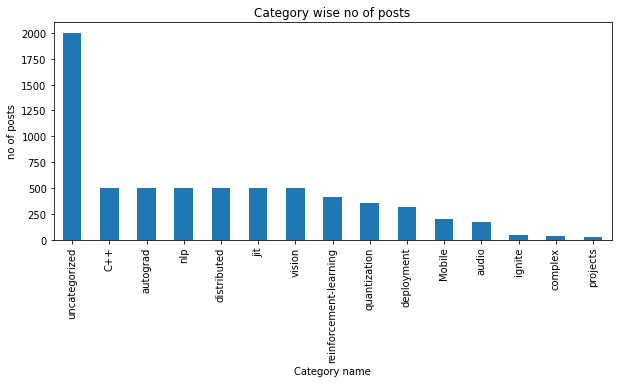

In [ ]:
my_categories = ['audio', 'projects', 'complex', 'ignite', 'C++', 'nlp',
       'distributed', 'jit', 'reinforcement-learning', 'Mobile',
       'quantization', 'deployment', 'uncategorized', 'vision',
       'autograd']
plt.figure(figsize=(10,4))
df.Category.value_counts().plot(kind='bar');
# Add title and axis names
plt.title('Category wise no of posts')
plt.xlabel('Category name')
plt.ylabel('no of posts')

# Text Pre-processing

In [ ]:
test_df = df.copy()

In [ ]:
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\'\“\”\’\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))

def clean_text(text):
    """
        text: a string
        
        return: modified initial string
    """
    text = BeautifulSoup(text, "lxml").text # HTML decoding
    text = text.lower() # lowercase text
    text = REPLACE_BY_SPACE_RE.sub(' ', text) # replace REPLACE_BY_SPACE_RE symbols by space in text
    #text = BAD_SYMBOLS_RE.sub('', text) # delete symbols which are in BAD_SYMBOLS_RE from text
    #text = ''.join(word for word in text if word not in punct)  # remove punctuation
    #text = ' '.join(word for word in text.split() if word not in STOPWORDS) # delete stopwors from text
    return text
    
test_df['post'] = test_df['post'].apply(clean_text)

In [ ]:
def test_print_plot(index):
    example = test_df[test_df.index == index][['post', 'Category']].values[0]
    if len(example) > 0:
        print(example[0])
        print('Category:', example[1])
test_print_plot(10)

why does my pytorch tensor size change and contain nans after some batches?    something was wrong with my labels. see stackoverflow for more  i am training a pytorch model. after some time  even if on shuffle  the model contains  besides a few finite tensorrows only nan values:
tensor        nan      nan      nan   ...      nan      nan      nan  
              nan      nan      nan   ...      nan      nan      nan  
              nan      nan      nan   ...      nan      nan      nan  
         ... 
           1.4641   0.0360  -1.1528   ...  -2.3592  -2.6310   6.3893  
              nan      nan      nan   ...      nan      nan      nan  
              nan      nan      nan   ...      nan      nan      nan    
       device= cuda:0   grad_fn= 

the detect_anomaly functions return:

runtimeerror: function ‘logsoftmaxbackward  returned nan values in its 0th output.

in reference to the next line output = f.log_softmax output  dim=2 
a normal tensor should look like this:
tensor    -3.3

In [ ]:
test_df['post'].apply(lambda x: len(x.split(' '))).sum()

4942484

In [ ]:
4942484 - 3911834

1030650

# Modeling the data

In [ ]:
X = test_df.post
y = test_df.Category
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)

In [ ]:
X_train.head()

6399    model parameters don t update during training ...
5623    how to calculate dimensions of first linear la...
5141    is this usage of mseloss correct?    one is en...
6505    debugging memory allocations in `torch.autogra...
4952    runtimeerror: input type  torch.cuda.floattens...
Name: post, dtype: object

In [ ]:
y_train.head()

6399         autograd
5623           vision
5141    uncategorized
6505         autograd
4952    uncategorized
Name: Category, dtype: object

# Naive Bayes Classifier for Multinomial Models




## CountVectorizer + TF-IDFTransformer + MultinomialNB

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer

nb = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', MultinomialNB()),
              ])
nb.fit(X_train, y_train)


from sklearn.metrics import classification_report
y_pred = nb.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
res1311 = accuracy_score(y_pred, y_test)
print(classification_report(y_test, y_pred,target_names=my_categories))

accuracy 0.2916666666666667
                        precision    recall  f1-score   support

                 audio       0.00      0.00      0.00       159
              projects       0.00      0.00      0.00        60
               complex       0.00      0.00      0.00        59
                ignite       0.00      0.00      0.00       152
                   C++       0.00      0.00      0.00        13
                   nlp       0.00      0.00      0.00        99
           distributed       0.00      0.00      0.00       165
                   jit       0.00      0.00      0.00        14
reinforcement-learning       0.00      0.00      0.00       134
                Mobile       0.00      0.00      0.00       152
          quantization       0.00      0.00      0.00         8
            deployment       0.00      0.00      0.00       116
         uncategorized       0.00      0.00      0.00       119
                vision       0.29      1.00      0.45       575
           

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Linear Support Vector Machine CountVectorizer + TF-IDFTransformer + SGDClassifier

In [ ]:
from sklearn.linear_model import SGDClassifier

sgd = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42, max_iter=5, tol=None)),
               ])
sgd.fit(X_train, y_train)

y_pred = sgd.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
res1321 = accuracy_score(y_pred, y_test)
print(classification_report(y_test, y_pred,target_names=my_categories))

accuracy 0.6702235772357723
                        precision    recall  f1-score   support

                 audio       0.80      0.80      0.80       159
              projects       0.88      0.77      0.82        60
               complex       0.88      0.51      0.65        59
                ignite       0.60      0.56      0.58       152
                   C++       1.00      0.08      0.14        13
                   nlp       0.62      0.15      0.24        99
           distributed       0.77      0.88      0.82       165
                   jit       1.00      0.86      0.92        14
reinforcement-learning       0.67      0.81      0.73       134
                Mobile       0.71      0.55      0.62       152
          quantization       0.00      0.00      0.00         8
            deployment       0.87      0.95      0.91       116
         uncategorized       0.78      0.76      0.77       119
                vision       0.56      0.78      0.66       575
           

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Logistic Regression CountVectorizer + TF-IDFTransformer + Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

logreg = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', LogisticRegression(n_jobs=1, C=1e5)),
               ])
logreg.fit(X_train, y_train)

y_pred = logreg.predict (X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
res1331 = accuracy_score(y_pred, y_test)
print(classification_report(y_test, y_pred,target_names=my_categories))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


accuracy 0.6402439024390244
                        precision    recall  f1-score   support

                 audio       0.81      0.72      0.76       159
              projects       0.90      0.77      0.83        60
               complex       0.95      0.59      0.73        59
                ignite       0.54      0.53      0.53       152
                   C++       1.00      0.15      0.27        13
                   nlp       0.43      0.23      0.30        99
           distributed       0.83      0.77      0.80       165
                   jit       0.87      0.93      0.90        14
reinforcement-learning       0.73      0.74      0.74       134
                Mobile       0.65      0.57      0.61       152
          quantization       0.00      0.00      0.00         8
            deployment       0.93      0.90      0.91       116
         uncategorized       0.84      0.69      0.76       119
                vision       0.52      0.71      0.60       575
           

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Decision Tree CountVectorizer + TF-IDFTransformer + DecisionTreeClassifier 

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dtree = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', DecisionTreeClassifier(random_state=0)),
               ])
dtree.fit(X_train, y_train)

y_pred = dtree.predict (X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
res1341 = accuracy_score(y_pred, y_test)
print(classification_report(y_test, y_pred,target_names=my_categories))

accuracy 0.5152439024390244
                        precision    recall  f1-score   support

                 audio       0.57      0.58      0.57       159
              projects       0.80      0.72      0.75        60
               complex       0.52      0.42      0.47        59
                ignite       0.45      0.48      0.46       152
                   C++       0.00      0.00      0.00        13
                   nlp       0.22      0.18      0.20        99
           distributed       0.70      0.64      0.67       165
                   jit       0.67      0.71      0.69        14
reinforcement-learning       0.62      0.63      0.62       134
                Mobile       0.48      0.53      0.50       152
          quantization       0.00      0.00      0.00         8
            deployment       0.81      0.85      0.83       116
         uncategorized       0.67      0.61      0.63       119
                vision       0.46      0.48      0.47       575
           

# **Results**

In [ ]:
import pandas as pd

results = pd.DataFrame({'Model': ['Naive Bayes MultinomialNB', 'Linear SVM', 'Logistic Regression', 'Decision Tree'],
                         'Accuracy': [res1311, res1321, res1331, res1341]})
results.set_index('Model')
results.sort_values(by='Accuracy')

,Model,Accuracy
0,Naive Bayes MultinomialNB,0.291667
3,Decision Tree,0.515244
2,Logistic Regression,0.640244
1,Linear SVM,0.670224


# *Cross* Validation with linear SVM

In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

sgd = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42, max_iter=5, tol=None)),
               ])
cv_res_sgd = cross_val_score(sgd, X_train, y_train, cv=10)
mean_cv_res_sgd = np.mean(cv_res_sgd)

In [ ]:
print(mean_cv_res_sgd)

0.6487382779198636


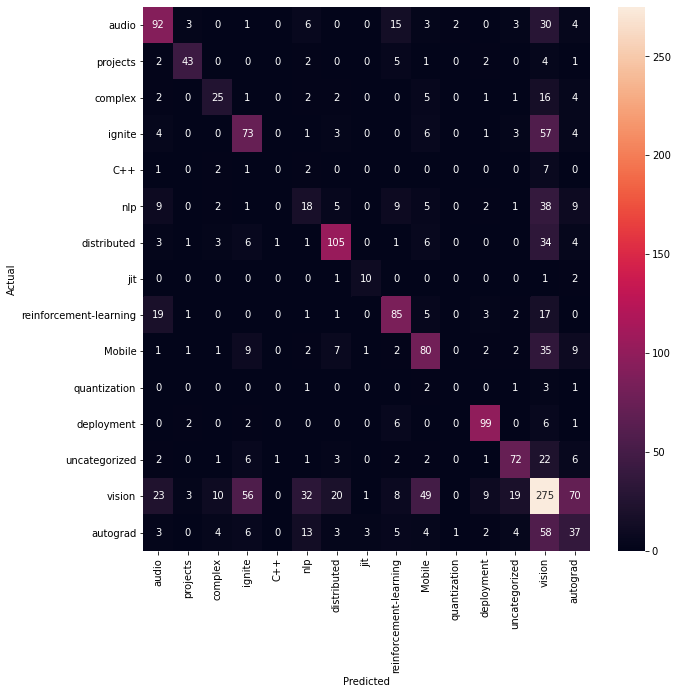

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=my_categories, yticklabels=my_categories)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

Using TF-IDF as a vectorizer and transformer is slighly better than using CountVectorizer as a Vectorizer.

# **XGBoost**

In [ ]:
!pip install xgboost

In [ ]:
import xgboost as xgb

xgb = Pipeline(steps=[('vect', TfidfVectorizer()),
                      ('tfidf', TfidfTransformer()),
                      ('xgboost', xgb.XGBClassifier(objective='multi:softmax'))])

cv_res_xgb_tfidf = cross_val_score(xgb, X_train, y_train, cv=10)
mean_cv_res_xgb_tfidf = np.mean(cv_res_xgb_tfidf)

In [ ]:
mean_cv_res_xgb_tfidf

0.6376238514729564

In [ ]:
xgb.fit(X_train, y_train)

y_pred = xgb.predict(X_test)

# Confusion Matric using XG Boost

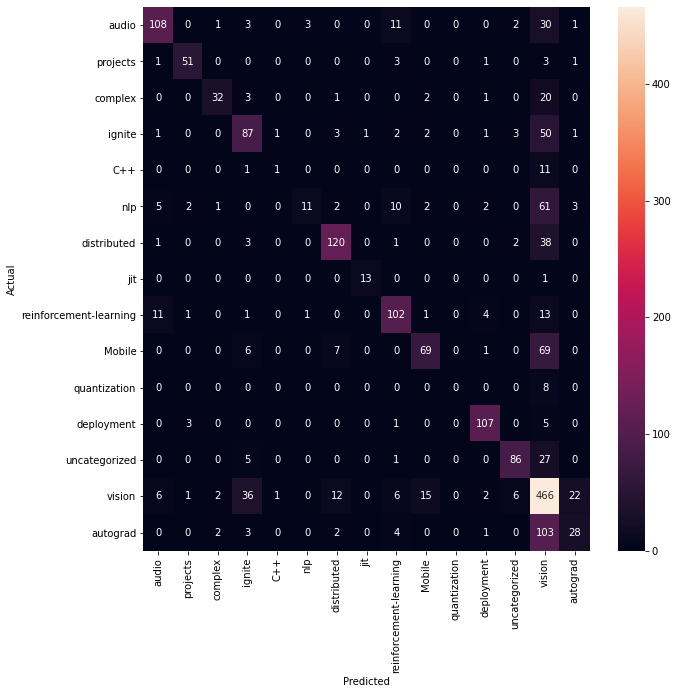

In [ ]:
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=my_categories, yticklabels=my_categories)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# **Light GBM**

In [ ]:
!pip install lightgbm

In [ ]:
import lightgbm as lgbm

tfidf_vec = TfidfVectorizer(dtype=np.float32, sublinear_tf=True, use_idf=True, smooth_idf=True)
X_data_tfidf = tfidf_vec.fit_transform(test_df['post'])
X_train_tfidf = tfidf_vec.transform(X_train)
X_test_tfidf = tfidf_vec.transform(X_test)

clf_LGBM = lgbm.LGBMClassifier(objective='multiclass', verbose=-1, learning_rate=0.5, max_depth=20, num_leaves=50, n_estimators=120, max_bin=2000,)
clf_LGBM.fit(X_train_tfidf, y_train, verbose=-1)
predicted_LGBM = clf_LGBM.predict(X_test_tfidf)

In [ ]:
cv_res_lgbm_tfidf = cross_val_score(clf_LGBM, X_train_tfidf, y_train, cv=10)
mean_cv_res_lgbm_tfidf = np.mean(cv_res_lgbm_tfidf)

In [ ]:
mean_cv_res_lgbm_tfidf

0.19815667329733827

In [ ]:
print('accuracy %s' % accuracy_score(predicted_LGBM, y_test))
res_lgbm = accuracy_score(predicted_LGBM, y_test)
print(classification_report(y_test, predicted_LGBM,target_names=my_categories))

accuracy 0.2804878048780488
                        precision    recall  f1-score   support

                 audio       0.00      0.00      0.00       159
              projects       0.00      0.00      0.00        60
               complex       0.00      0.00      0.00        59
                ignite       0.00      0.00      0.00       152
                   C++       0.00      0.00      0.00        13
                   nlp       0.00      0.00      0.00        99
           distributed       1.00      0.01      0.01       165
                   jit       0.00      0.00      0.00        14
reinforcement-learning       0.08      0.01      0.02       134
                Mobile       0.00      0.00      0.00       152
          quantization       0.00      0.00      0.00         8
            deployment       0.00      0.00      0.00       116
         uncategorized       0.00      0.00      0.00       119
                vision       0.29      0.95      0.45       575
           

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Confusion Matric using Light GBM

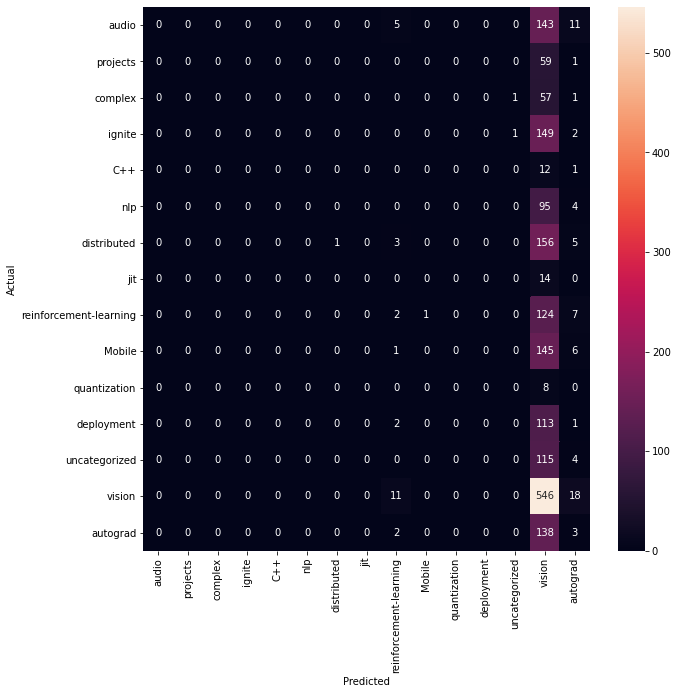

In [ ]:
conf_mat = confusion_matrix(y_test, predicted_LGBM)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=my_categories, yticklabels=my_categories)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()